# Tugas 1

In [ ]:
import pandas as pd

In [ ]:
# Create dataset from Google Drive
url = "https://raw.githubusercontent.com/vincent101/KRR/master/Advertising.csv"
data = pd.read_csv(url)
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
sales = data ['Sales']
sales

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
import statistics as st

In [ ]:
mean=st.mean(sales)
print('mean = ',mean)

mean =  14.022499999999999


In [ ]:
median=st.median(sales)
print('median =',median)

median = 12.9


In [ ]:
modus=st.mode(sales)
print('Modus = ',modus)

Modus =  9.7


In [ ]:
varian=sales.var()
print('Varian = ',varian)

Varian =  27.22185301507538


In [ ]:
sales.skew()

0.4075714250767127

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

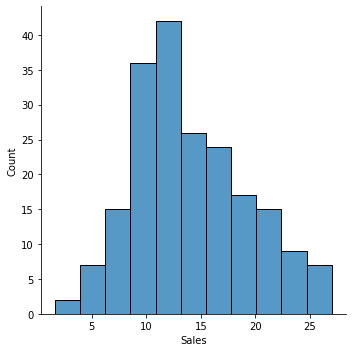

In [ ]:
plt.figure()
sns.displot(sales)
plt.show()

# TUGAS 2
### 1. Equal-width



>*Equal-width adalah algoritma untuk membagi rentang dari X menjadi k interval dengan ukuran lebar yang sama* 




In [ ]:
import pandas as pd
import numpy as np
import statistics as st
pd.options.mode.chained_assignment=None

url_iris='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data_iris=pd.read_csv(url_iris)
data_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
data_sepal_length =  data_iris[["sepal.length"]] #data frame
data_sepal_width =  data_iris[["sepal.width"]]
data_petal_length =  data_iris[["petal.length"]]
data_petal_width =  data_iris[["petal.width"]]

Method cut digunakan untuk mencari interval menggunakan metode equal-width interval

In [ ]:
def cut(col,k):
  intervals=pd.cut(data_iris[col],k).value_counts().index.to_list() 
  return [[interval.left,interval.right] for interval in intervals]

In [ ]:
def toCategory(list_interval,col):
  #get length interval
  length = len(list_interval)

  #sorting interval
  sort_interval=np.sort(list_interval,axis=0)
  #get category from interval
  categories = np.array([chr(65+i) for i in range(length)])[:,None]
  #combine into interval data
  intervals = np.hstack((sort_interval,categories))

  #operate all data
  newCol=[]
  for i, row in data_iris.iterrows():
    data=row[col]
    for interval in intervals:
      if data >= interval[0].astype(float) and data <= interval[1].astype(float):
        newCol.append(interval[2])
        break

  #return new column category
  return np.array(newCol,dtype=str) 


Mencari interval sebagai contoh disini dibagi menjadi 3 bagian

In [ ]:
interval_sepal_length =  cut("sepal.length",3) #data frame
interval_sepal_width =  cut("sepal.width",3)
interval_petal_length =  cut("petal.length",3)
interval_petal_width =  cut("petal.width",3)

print("interval_sepal.length :",interval_sepal_length)
print("interval_sepal.width :",interval_sepal_width)
print("interval_petal.length :",interval_petal_length)
print("interval_petal.width :",interval_petal_width)

interval_sepal.length : [[5.5, 6.7], [4.296, 5.5], [6.7, 7.9]]
interval_sepal.width : [[2.8, 3.6], [1.998, 2.8], [3.6, 4.4]]
interval_petal.length : [[2.967, 4.933], [0.994, 2.967], [4.933, 6.9]]
interval_petal.width : [[0.9, 1.7], [0.0976, 0.9], [1.7, 2.5]]


Tampilan hasil dari pembagian category

In [ ]:
data_sepal_length["category"] = toCategory(interval_sepal_length,"sepal.length")
data_sepal_width["category"] = toCategory(interval_sepal_width,"sepal.width")
data_petal_length["category"] = toCategory(interval_petal_length,"petal.length")
data_petal_width["category"] = toCategory(interval_petal_width,"petal.width")

display(data_sepal_length)
display(data_sepal_width)
display(data_petal_length)
display(data_petal_width)

,sepal.length,category
0,5.1,A
1,4.9,A
2,4.7,A
3,4.6,A
4,5.0,A
...,...,...
145,6.7,B
146,6.3,B
147,6.5,B
148,6.2,B


,sepal.width,category
0,3.5,B
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,B
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,B


,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


,petal.width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,C
146,1.9,C
147,2.0,C
148,2.3,C


### 2. Equal frekuensi interval
>*Equal frekuensi interval adalah algoritma untuk membagi rentang dari X menjadi rentang-rentang yang berisi nilai data yang kurang lebih nilainya sama*


In [ ]:
data_sepal_length = data_iris[["sepal.length"]]
data_sepal_width = data_iris[["sepal.width"]]
data_sepal_length = data_iris[["petal.length"]]
data_petal_width = data_iris[["petal.width"]]

pandas menyediakan qcut ubtuk mencari nilai interval dari Equal-Frequency Intervals

In [ ]:
def qcut(col, k):
  intervals = pd.qcut(data_iris[col], k).value_counts().index.to_list()
  return [[interval.left, interval.right] for interval in intervals]

Mencari interval sebagai contoh disini dibagi menjadi 3 bagian

In [ ]:
interval_sepal_length =  qcut("sepal.length",3) #data frame
interval_sepal_width =  qcut("sepal.width",3)
interval_petal_length =  qcut("petal.length",3)
interval_petal_width =  qcut("petal.width",3)

print("interval_sepal.length :",interval_sepal_length)
print("interval_sepal.width :",interval_sepal_width)
print("interval_petal.length :",interval_petal_length)
print("interval_petal.width :",interval_petal_width)

interval_sepal.length : [[5.4, 6.3], [4.2989999999999995, 5.4], [6.3, 7.9]]
interval_sepal.width : [[1.999, 2.9], [2.9, 3.2], [3.2, 4.4]]
interval_petal.length : [[2.633, 4.9], [0.999, 2.633], [4.9, 6.9]]
interval_petal.width : [[0.867, 1.6], [0.099, 0.867], [1.6, 2.5]]


Menampilkan hasil pembagian category

In [ ]:
data_sepal_length["category"] = toCategory(interval_sepal_length,"sepal.length")
data_sepal_width["category"] = toCategory(interval_sepal_width,"sepal.width")
data_petal_length["category"] = toCategory(interval_petal_length,"petal.length")
data_petal_width["category"] = toCategory(interval_petal_width,"petal.width")

display(data_sepal_length)
display(data_sepal_width)
display(data_petal_length)
display(data_petal_width)

,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,B
147,5.2,C
148,5.4,B


,sepal.width,category
0,3.5,C
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,C
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,C


,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


,petal.width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,C
146,1.9,C
147,2.0,C
148,2.3,C


### 3. Entropy 

>*Entropy adalah*
Entropi adalah sifat termodinamika yang penting dari sebuah zat, dimana harganya akan meningkat ketika ada penambahan kalor dan menurun ketika terjadi pengurangan kalor. Adalah sulit untuk mengukur entropi, tetapi akan mudah untuk mencari perubahan entropi dari suatu zat. Pada jangkauan kecil temperature, kenaikan atau penurunan entropi jika dikalikan dengan temperature akan menghasilkan jumlah kalor yang diserap atau dilepaskan oleh suatu zat.
>*   Rumus Entropy:



$$Entropy (D_{1}) = -\sum_{i=1}^{m} Pi \log_{2} Pi$$

>*   Rumus Gain:



$$Gain(E_{new}) = E_{initial} - E_{new}$$
>*   Rumus Info:



$$Info_{A}(D) = \frac{|D_{_{1}}|}{|D|} Entropy(D_{1}) + \frac{|D_{2}|}{|D|} Entropy(D_{2})$$

Membuat sample data untuk di analisis

In [ ]:
sample = data_iris[["sepal.length"]]
sample.describe()

,sepal.length
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


Membuat category random untuk semua data

In [ ]:
np.random.seed(0)
sample["category"] = np.where(np.random.choice(2,sample.shape[0]) < 1,"A","B")
sample

,sepal.length,category
0,5.1,A
1,4.9,B
2,4.7,B
3,4.6,A
4,5.0,B
...,...,...
145,6.7,A
146,6.3,B
147,6.5,B
148,6.2,B


Membuat fungsi GetOverollCategory (keseluruhan) yang digunakan untuk menghitung data keseluruhan yang nantinya digunakan untuk menghitung entropy

In [ ]:
def GetOverollCategory(col):
  group = sample.loc[:, :].groupby("category").count()
  a = group.loc["A", col]
  b = group.loc["B", col]
  return (a,b,a+b)

Fungsi splitter digunakan untuk membuat split antara value yang telah ditentukan lalu mengembalikan data yang telah dipisahkan

In [ ]:
def splitter(value, col):
  #get data less and greater from value
  less = sample[sample[col] <= value]
  greater = sample[sample[col] > value]

  #calculate into category for each data
  less_group = less.loc[:, :].groupby("category").count()
  greater_group = greater.loc[:, :].groupby("category").count()

  #get value based on category
  less_category_A = less_group.loc["A",col]
  less_category_B = less_group.loc["B",col]
  greater_category_A = greater_group.loc["A",col]
  greater_category_B = greater_group.loc["B",col]

  return (
      [less_category_A, less_category_B, less_category_A + less_category_B],
      [greater_category_A, greater_category_B, greater_category_A + greater_category_B]
  )

Buat fungsi entropy untuk mencari nilai entropy

In [ ]:
def entropy (d):
  r1 = (d[0] / d[2]) * np.log2(d[0] / d[2])
  r2 = (d[1] / d[2]) * np.log2(d[1] / d[2])
  return np.sum([r1, r2]) * -1

Membuat fungsi info dan gain

In [ ]:
def info(d):
  r1 = (d[0][2] / sample.shape[0]) * entropy(d[0])
  r2 = (d[1][2] / sample.shape[0]) * entropy(d[1])
  return r1 + r2

Fungsi gain untuk menghitung selisih antara entropy awal dengan yang baru

In [ ]:
def gain(Einitial, Enew):
  return Einitial - Enew

Membuat Dinitial

In [ ]:
D = GetOverollCategory("sepal.length")
entropy_d = entropy(D)
print(D)
print(entropy_d)

(68, 82, 150)
0.993707106604508


Melakukan beberapa tes split untuk menari informasi yang terbaik

### *Split 1 : 4.4*

In [ ]:
split1 = splitter(4.4, "sepal.length")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.003488151753460178

### *Split 2 : 5.5*

In [ ]:
split2 = splitter(5.5, "sepal.length")
info_split2 = info(split2)
gain(entropy_d, info_split2)

0.012302155146638905

### *Split 3 : 7.0*

In [ ]:
split3 = splitter(7.0, "sepal.length")
info_split3 = info(split3)
gain(entropy_d, info_split3)

0.0005490214732508658

Split terbaik yaitu split 3 yang memberikan keuntungan informasi sebesar 0.0005490214732508658 karena yang paling rendah

# LATIHAN

## KNN (using scikit-learn) on iris dataset
Building a model to classify the species of Iris flower based on the sepal length, speal width, petal length and petal width

In [ ]:
# Data in a csv format, each observation has a 4 measurements/features 
# and the species type.
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=400, height=200)

## Load the iris data set and check the features

In [ ]:
#import the load_iris function from datasets module
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(iris.data.shape)

(150, 4)


In [ ]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target

In [ ]:
print(X.shape)
print(y.shape)


(150, 4)
(150,)


### Train The Model

In [ ]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


In [ ]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [ ]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Testing accuracy for each value of K
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

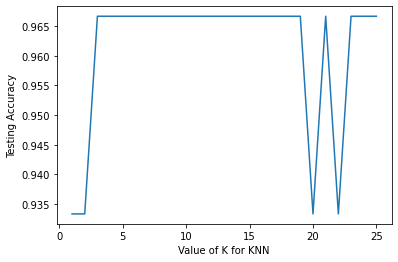

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## K values with 3 to 19 has the same accuracy which is 96.66, so we can use any one value from that, i choose K as 5 and train the model with full training data


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [ ]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
